In [1]:
import environments
import numpy as np
from collections import deque
from library import *

In [2]:
env1 = environments.environment_gym('Acrobot-v1')
env = environments.env_wrapper(env1,is_discretised = True)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
n_actions = 3

Episode [499/500]max -496.97


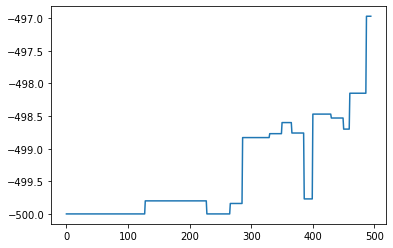

In [9]:
#random policy
policy = random()
Q = defaultdict(lambda: np.zeros(n_actions))
mean_scores, score, moving_window = play(env, Q, 500, policy)
moving_window = moving_window[5:]
print('max',max(moving_window))
plt.plot(moving_window)
plt.show()

In [5]:
eps = epsilon(eps_start = 1.0, eps_decay = 0.99, eps_min = 0.1)
policy = epsilon_greedy(eps,200)
Q_class = update_control_Q(n_actions,alpha = 0.2, gamma = 1.0)
mr = MC(env, policy, Q_class, 500, generate_episode, stopping = None, print_every = 10)

Episode 500/500 with mean reward -494.83

Episode [499/500]max -500.0


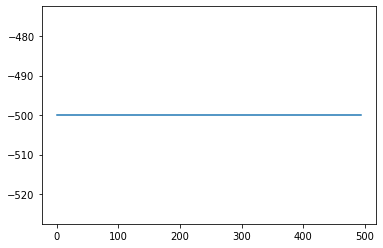

In [6]:
policy = maximum()
mean_scores, score, moving_window = play(env, Q_class.Q, 500, policy)
moving_window = moving_window[5:]
print('max',max(moving_window))
plt.plot(moving_window)
plt.show()

In [7]:
eps = epsilon(eps_start = 1.0, eps_decay = 0.8, eps_min = 0.01)
policy = epsilon_greedy(eps,200)
Q_class = update_expectedsarsamax_Q(n_actions, alpha = 0.4, gamma = 1.0, eps = 0.2)
means = TD(env, policy, Q_class,500, stopping = None, print_every = 10)

Episode 500/500 with mean reward -499.19

Episode [499/500]max -499.63


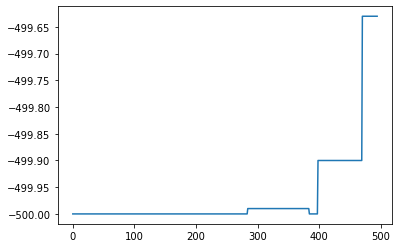

In [8]:
policy = maximum()
mean_scores, score, moving_window = play(env, Q_class.Q, 500, policy)
moving_window = moving_window[5:]
print('max',max(moving_window))
plt.plot(moving_window)
plt.show()